# Imports

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config
import io
import pydotplus
from copy import deepcopy
from decimal import *
from sklearn.feature_selection import RFE

from rtblib.dbsimplesession import *
from rtblib.collection import *

%matplotlib inline
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 2000
plt.rc("font", size=14)
sns.set(style="white")  # white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# Connection

In [120]:
SQL_FLAT_IRON = """
SELECT tt.invoice_id,tt.target AS 'Due',tt.tr_diff_current_overdue,tt.tr_invoice_supplier_type, tt.tr_invoice_contractor_type, etd_supl_source_regon,
di.tr_invoice_pair_type, di.etd_supl_source_regon,etd_cont_date_creation, tr_invoice_ammount_vat, etd_cont_equity, appl_legal3,
invoice_ammount_net, invoice_ammount_gross
FROM tk_target tt
LEFT JOIN data_invoices di
ON tt.invoice_id=di.invoice_id
WHERE tt.rpt_istest=0
AND tt.my_isok=1
AND tt.my_isaccepted=1
AND tt.rpt_istest=0
AND tt.rpt_isfraudster=0
ORDER BY tt.tr_diff_current_overdue
"""
#dbo = DbOptions('mysql', **config.DB_OPTIONS)
#con = DbSimpleConnnection(dbo)
#cur = con.execute(SQL_FLAT_IRON)
#rows = cur.fetchall()
#invoices_df = pd.DataFrame(rows)
# 127 columns, 317 rows
invoices_df=pd.read_csv('invoices_flat_iron.csv')
#con.close()

# Data quality

In [121]:
# column names
invoices_df.columns.values

array(['Unnamed: 0', 'Due', 'appl_legal3', 'di.etd_supl_source_regon',
       'etd_cont_date_creation', 'etd_cont_equity',
       'etd_supl_source_regon', 'invoice_ammount_gross',
       'invoice_ammount_net', 'invoice_id', 'tr_diff_current_overdue',
       'tr_invoice_ammount_vat', 'tr_invoice_contractor_type',
       'tr_invoice_pair_type', 'tr_invoice_supplier_type'], dtype=object)

In [122]:
invoices_df.head()
invoices_df.shape

(122, 15)

In [123]:
print(invoices_df.describe())

       Unnamed: 0         Due  appl_legal3  di.etd_supl_source_regon  \
count  122.000000  122.000000   122.000000                 83.000000   
mean    60.500000    0.172131     0.459016                  0.807229   
std     35.362409    0.379051     0.500372                  0.396873   
min      0.000000    0.000000     0.000000                  0.000000   
25%     30.250000    0.000000     0.000000                  1.000000   
50%     60.500000    0.000000     0.000000                  1.000000   
75%     90.750000    0.000000     1.000000                  1.000000   
max    121.000000    1.000000     1.000000                  1.000000   

       etd_cont_equity  etd_supl_source_regon  invoice_ammount_gross  \
count     4.900000e+01              83.000000             122.000000   
mean      8.019082e+05               0.807229            3719.831393   
std       2.179654e+06               0.396873            2901.803914   
min       5.000000e+03               0.000000             196.8

In [124]:
print(invoices_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 15 columns):
Unnamed: 0                    122 non-null int64
Due                           122 non-null int64
appl_legal3                   122 non-null int64
di.etd_supl_source_regon      83 non-null float64
etd_cont_date_creation        42 non-null object
etd_cont_equity               49 non-null float64
etd_supl_source_regon         83 non-null float64
invoice_ammount_gross         122 non-null float64
invoice_ammount_net           122 non-null float64
invoice_id                    122 non-null int64
tr_diff_current_overdue       122 non-null int64
tr_invoice_ammount_vat        122 non-null float64
tr_invoice_contractor_type    122 non-null object
tr_invoice_pair_type          122 non-null object
tr_invoice_supplier_type      122 non-null object
dtypes: float64(6), int64(5), object(4)
memory usage: 14.4+ KB
None


In [125]:
print(invoices_df.isnull().sum())

Unnamed: 0                     0
Due                            0
appl_legal3                    0
di.etd_supl_source_regon      39
etd_cont_date_creation        80
etd_cont_equity               73
etd_supl_source_regon         39
invoice_ammount_gross          0
invoice_ammount_net            0
invoice_id                     0
tr_diff_current_overdue        0
tr_invoice_ammount_vat         0
tr_invoice_contractor_type     0
tr_invoice_pair_type           0
tr_invoice_supplier_type       0
dtype: int64


In [126]:
invoices_df.fillna(value=0,axis=0,inplace=True)
print(invoices_df.isnull().sum())

Unnamed: 0                    0
Due                           0
appl_legal3                   0
di.etd_supl_source_regon      0
etd_cont_date_creation        0
etd_cont_equity               0
etd_supl_source_regon         0
invoice_ammount_gross         0
invoice_ammount_net           0
invoice_id                    0
tr_diff_current_overdue       0
tr_invoice_ammount_vat        0
tr_invoice_contractor_type    0
tr_invoice_pair_type          0
tr_invoice_supplier_type      0
dtype: int64


# Explanatory data analysis

In [127]:
discrete=['appl_legal3','di.etd_supl_source_regon','etd_cont_date_creation','etd_supl_source_regon','tr_invoice_contractor_type','tr_invoice_pair_type','tr_invoice_supplier_type']
continuous = ['invoice_ammount_gross','invoice_ammount_net','etd_cont_equity','tr_diff_current_overdue']

c:\users\michu\appdata\local\programs\python\python36x64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


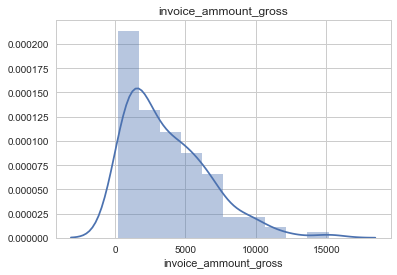

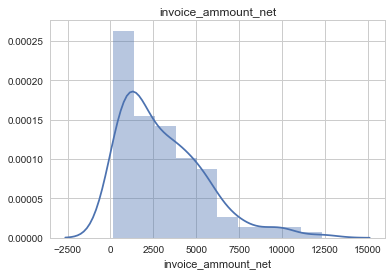

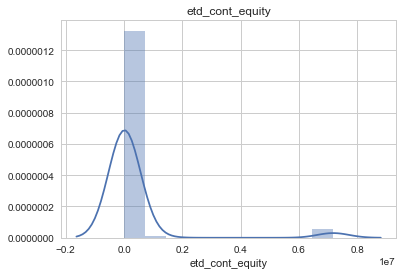

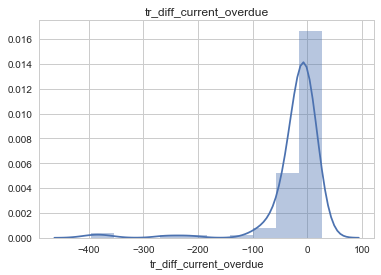

<Figure size 432x288 with 0 Axes>

In [128]:
for attr in continuous:
    invoices_df[attr]=invoices_df[attr].astype(float)
    sns.distplot(invoices_df[attr], bins=10).set_title(attr)
    plt.figure()

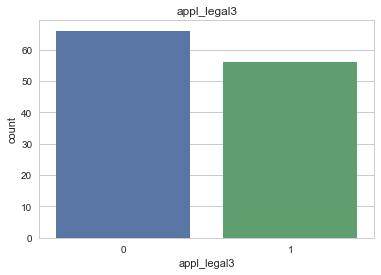

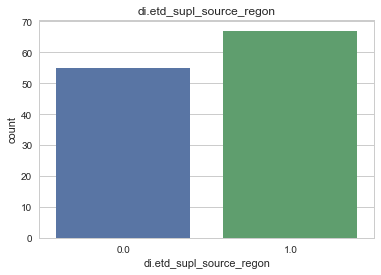

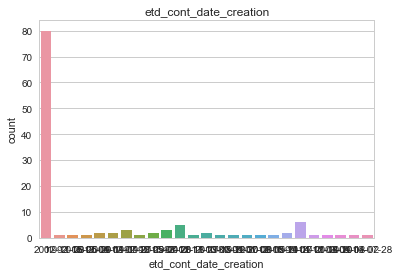

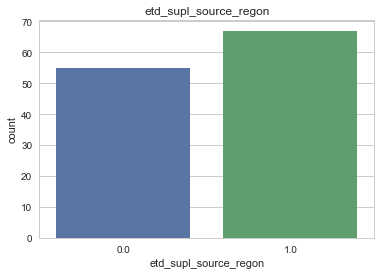

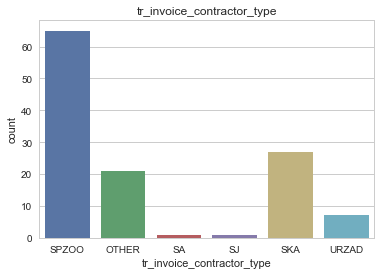

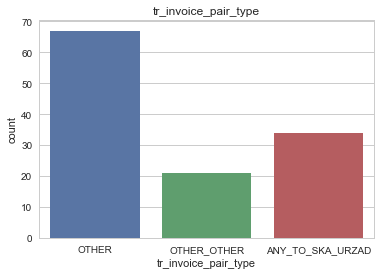

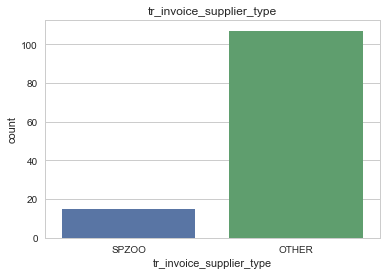

<Figure size 432x288 with 0 Axes>

In [129]:
for attr in discrete:
    sns.countplot(invoices_df[attr]).set_title(attr)
    plt.figure()

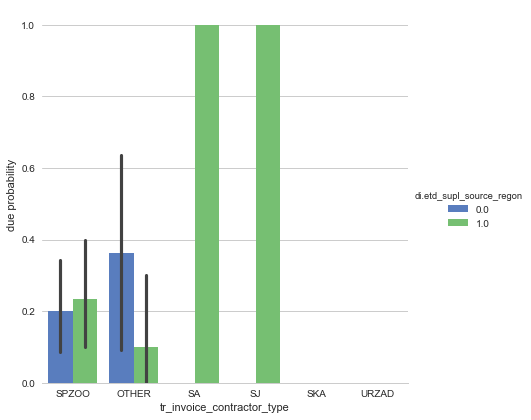

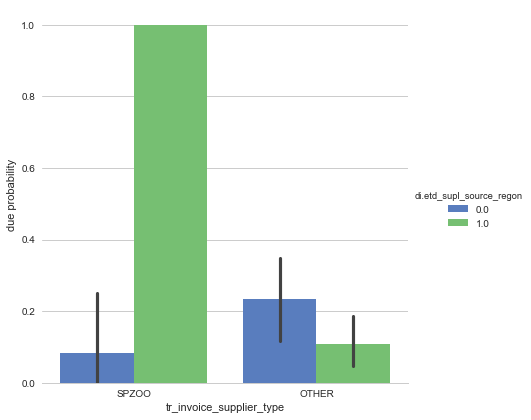

In [130]:
# Draw a nested barplot to show survival for class and sex

g = sns.factorplot(x="tr_invoice_contractor_type", y="Due", hue="di.etd_supl_source_regon", data=invoices_df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("due probability")

g = sns.factorplot(x="tr_invoice_supplier_type", y="Due", hue="di.etd_supl_source_regon", data=invoices_df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("due probability")

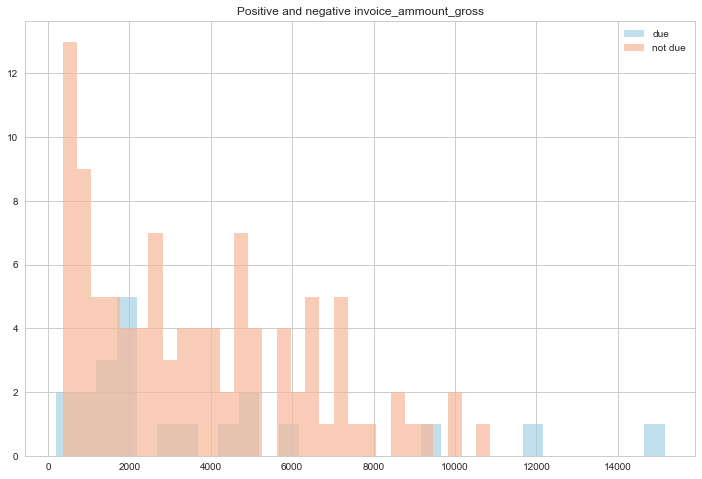

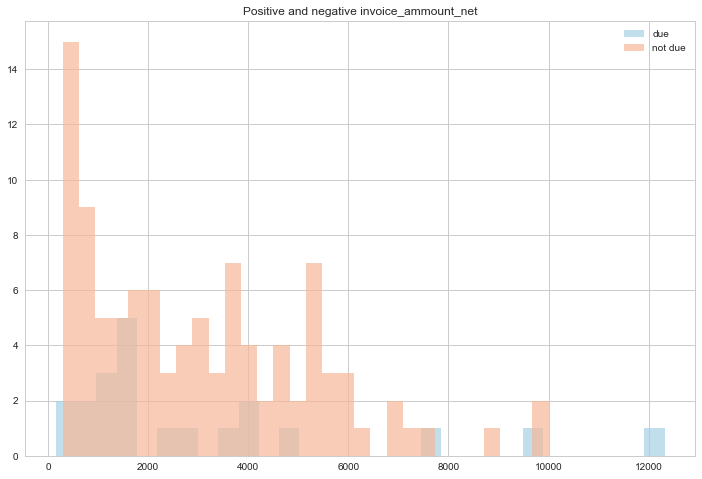

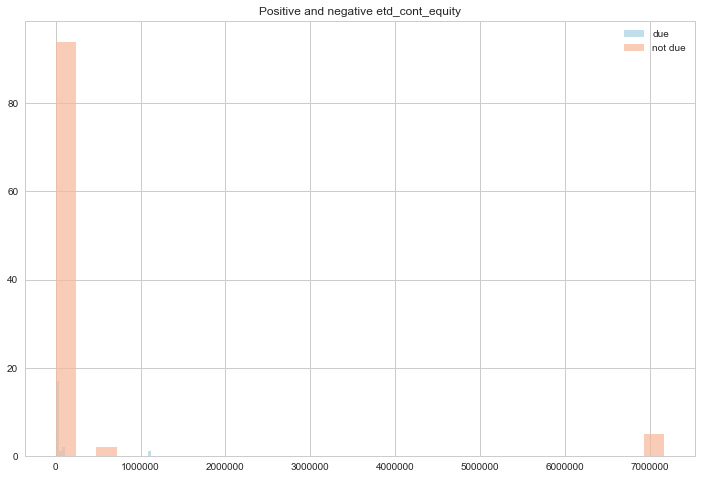

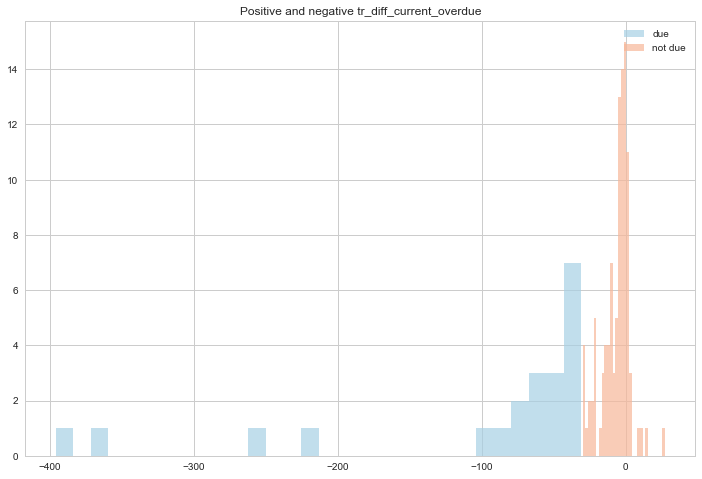

In [131]:
sns.set_palette("RdBu_r",2)
for arg in continuous:
    pos_tempo=invoices_df[invoices_df['Due']==1][arg]
    neg_tempo=invoices_df[invoices_df['Due']==0][arg]
    fig=plt.figure(figsize=(12,8))
    plt.title('Positive and negative '+arg)
    pos_tempo.hist(alpha=0.7, bins=30, label='due')
    neg_tempo.hist(alpha=0.7, bins=30, label='not due')
    plt.legend(loc='upper right')
    plt.show()

In [132]:
invoices_df.loc[lambda df: df.invoice_ammount_gross > 0, :]

,Unnamed: 0,Due,appl_legal3,di.etd_supl_source_regon,etd_cont_date_creation,etd_cont_equity,etd_supl_source_regon,invoice_ammount_gross,invoice_ammount_net,invoice_id,tr_diff_current_overdue,tr_invoice_ammount_vat,tr_invoice_contractor_type,tr_invoice_pair_type,tr_invoice_supplier_type
0,0,1,0,0.0,0,5000.0,0.0,1075.88,874.70,98,-396.0,0.23,SPZOO,OTHER,SPZOO
1,1,1,1,1.0,0,0.0,1.0,6150.00,5000.00,226,-371.0,0.23,SPZOO,OTHER,SPZOO
2,2,1,1,1.0,2012-11-08,0.0,1.0,9655.50,7850.00,468,-258.0,0.23,OTHER,OTHER_OTHER,OTHER
3,3,1,0,1.0,0,5000.0,1.0,15151.14,12318.00,619,-216.0,0.23,SPZOO,OTHER,SPZOO
4,4,1,0,1.0,0,6000.0,1.0,196.80,160.00,295,-100.0,0.23,SPZOO,OTHER,OTHER
5,5,1,1,1.0,0,1120000.0,1.0,2169.75,1764.03,87,-87.0,0.23,SA,OTHER,OTHER
6,6,1,1,0.0,1992-06-25,0.0,0.0,4674.00,3800.00,1196,-77.0,0.23,SPZOO,OTHER,OTHER
7,7,1,1,0.0,0,5000.0,0.0,3537.64,2876.13,372,-77.0,0.23,SPZOO,OTHER,OTHER
8,8,1,0,0.0,2015-06-09,0.0,0.0,1550.76,1260.78,1140,-65.0,0.23,OTHER,OTHER_OTHER,OTHER
9,9,1,1,0.0,0,5000.0,0.0,1312.13,1066.77,495,-57.0,0.23,SPZOO,OTHER,OTHER


In [133]:
tree_df=deepcopy(invoices_df)

# Logistic regression

## Data wrangling

In [135]:
def convert_data_to_1_0(data):
    return 1 if data else 0

# Prepare dataframe invoices_df for logistic regression

In [136]:
# converting 'etd_cont_date_creation' to 'date_creation_known' for more readibility
invoices_df['date_creation_known']=invoices_df['etd_cont_date_creation'].apply(convert_data_to_1_0)
invoices_df['etd_cont_equity']=invoices_df['etd_cont_equity'].apply(convert_data_to_1_0)

drop_labels_list=['Unnamed: 0','invoice_id','invoice_ammount_net','tr_diff_current_overdue','tr_invoice_ammount_vat','etd_cont_date_creation','etd_supl_source_regon']
invoices_df.drop(labels=drop_labels_list, axis='columns',inplace=True)
                                                  
dummies=['tr_invoice_contractor_type','tr_invoice_supplier_type','tr_invoice_pair_type']
logreg_df = pd.get_dummies(invoices_df, columns=dummies)

In [138]:
logreg_df.head()

,Due,appl_legal3,di.etd_supl_source_regon,etd_cont_equity,etd_supl_source_regon,invoice_ammount_gross,date_creation_known,tr_invoice_contractor_type_OTHER,tr_invoice_contractor_type_SA,tr_invoice_contractor_type_SJ,tr_invoice_contractor_type_SKA,tr_invoice_contractor_type_SPZOO,tr_invoice_contractor_type_URZAD,tr_invoice_supplier_type_OTHER,tr_invoice_supplier_type_SPZOO,tr_invoice_pair_type_ANY_TO_SKA_URZAD,tr_invoice_pair_type_OTHER,tr_invoice_pair_type_OTHER_OTHER
0,1,0,0.0,1,0.0,1075.88,0,0,0,0,0,1,0,0,1,0,1,0
1,1,1,1.0,0,1.0,6150.00,0,0,0,0,0,1,0,0,1,0,1,0
2,1,1,1.0,0,1.0,9655.50,1,1,0,0,0,0,0,1,0,0,0,1
3,1,0,1.0,1,1.0,15151.14,0,0,0,0,0,1,0,0,1,0,1,0
4,1,0,1.0,1,1.0,196.80,0,0,0,0,0,1,0,1,0,0,1,0


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [145]:
"""Zmienne w modelu: features
zgoda na przetw danych: 'appl_legal3'
czy dane w REGON 'di.etd_supl_source_regon' 
czy kapitał zakładowy większy niż 5000 'etd_cont_equity' 
wielkość faktury (jedyny parametr ciągły) 'invoice_ammount_gross'
znana data założenia firmy 'date_creation_known'
typ kontraktora  'tr_invoice_contractor_type_OTHER''tr_invoice_contractor_type_SA''tr_invoice_contractor_type_SJ''tr_invoice_contractor_type_SKA''tr_invoice_contractor_type_SPZOO''tr_invoice_contractor_type_URZAD'
typ suppliera  'tr_invoice_supplier_type_OTHER''tr_invoice_supplier_type_SPZOO'
'tr_invoice_pair_type_ANY_TO_SKA_URZAD''tr_invoice_pair_type_OTHER''tr_invoice_pair_type_OTHER_OTHER'
Sugerowane:

"""
features=['appl_legal3','di.etd_supl_source_regon','etd_cont_equity','invoice_ammount_gross','date_creation_known','tr_invoice_contractor_type_OTHER','tr_invoice_contractor_type_SA','tr_invoice_contractor_type_SJ','tr_invoice_contractor_type_SKA','tr_invoice_contractor_type_SPZOO','tr_invoice_contractor_type_URZAD','tr_invoice_supplier_type_OTHER','tr_invoice_supplier_type_SPZOO','tr_invoice_pair_type_ANY_TO_SKA_URZAD','tr_invoice_pair_type_OTHER','tr_invoice_pair_type_OTHER_OTHER']

### Selecting an appropriate number of features

In [147]:
from sklearn.feature_selection import RFECV
# RFE - Recursive Feature Elimination - selecting features by recursively 
# considering smaller and smaller sets of features
# coef_attribute - calculating the importance of each coefficeint
X=logreg_df[features]
y=logreg_df['Due']
model = LogisticRegression()
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Optimal number of features: 16
Selected features: ['appl_legal3', 'di.etd_supl_source_regon', 'etd_cont_equity', 'invoice_ammount_gross', 'date_creation_known', 'tr_invoice_contractor_type_OTHER', 'tr_invoice_contractor_type_SA', 'tr_invoice_contractor_type_SJ', 'tr_invoice_contractor_type_SKA', 'tr_invoice_contractor_type_SPZOO', 'tr_invoice_contractor_type_URZAD', 'tr_invoice_supplier_type_OTHER', 'tr_invoice_supplier_type_SPZOO', 'tr_invoice_pair_type_ANY_TO_SKA_URZAD', 'tr_invoice_pair_type_OTHER', 'tr_invoice_pair_type_OTHER_OTHER']


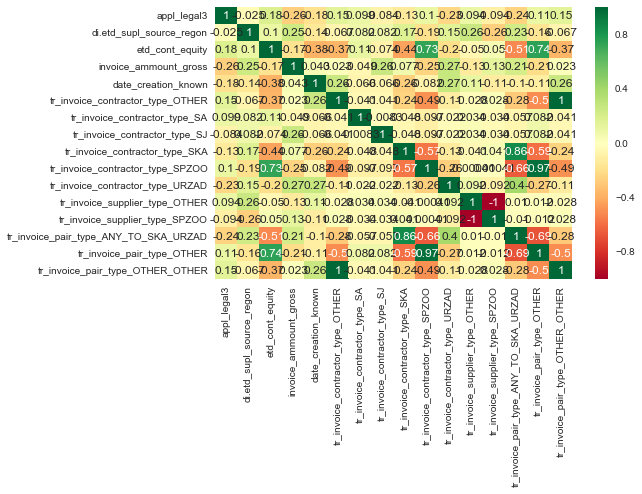

In [149]:
Selected_features = list(X.columns[rfecv.support_])
X = logreg_df[Selected_features]
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Model Evaluation

In [151]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, \
    precision_recall_curve, roc_curve, auc, log_loss

In [152]:
X = logreg_df[Selected_features]
y = logreg_df['Due']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print('Training set size: {}. Test set size: {}'.format(len(X_train),len(X_test)))

Training set size: 97. Test set size: 25


In [154]:
# Learning
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
score=accuracy_score(y_test, y_pred)*100
score

76.0

Train/Test split results:
LogisticRegression accuracy is 0.760
LogisticRegression log_loss is 0.546
LogisticRegression auc is 0.596


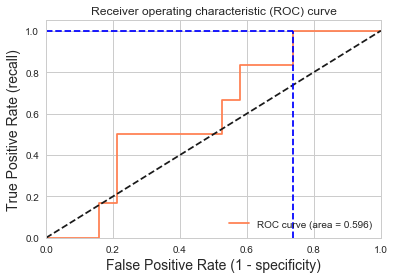

Using a threshold of 0.110 guarantees a sensitivity of 1.000 and a specificity of 0.263, i.e. a false positive rate of 73.68%.


In [156]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__ + " accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__ + " log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__ + " auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1 - fpr[idx]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx]) * 100))

# Decision Trees
### problem with trees: overfitting!
### easy to interpret
### minimal data preparation

In [37]:
import graphviz
import io
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from scipy import misc
from sklearn.metrics import accuracy_score

In [38]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams['figure.figsize']=(20,20)
    plt.imshow(img)

In [39]:
train,test=train_test_split(tree_df, test_size=0.2)
print('Training set size: {}. Test set size: {}'.format(len(train),len(test)))

Training set size: 97. Test set size: 25


In [40]:
tree_df

,Unnamed: 0,Due,appl_legal3,di.etd_supl_source_regon,etd_cont_date_creation,etd_cont_equity,etd_supl_source_regon,invoice_ammount_gross,invoice_ammount_net,invoice_id,tr_diff_current_overdue,tr_invoice_ammount_vat,tr_invoice_contractor_type,tr_invoice_pair_type,tr_invoice_supplier_type
0,0,1,0,0.0,0,5000.0,0.0,1075.88,874.70,98,-396.0,0.23,SPZOO,OTHER,SPZOO
1,1,1,1,1.0,0,0.0,1.0,6150.00,5000.00,226,-371.0,0.23,SPZOO,OTHER,SPZOO
2,2,1,1,1.0,2012-11-08,0.0,1.0,9655.50,7850.00,468,-258.0,0.23,OTHER,OTHER_OTHER,OTHER
3,3,1,0,1.0,0,5000.0,1.0,15151.14,12318.00,619,-216.0,0.23,SPZOO,OTHER,SPZOO
4,4,1,0,1.0,0,6000.0,1.0,196.80,160.00,295,-100.0,0.23,SPZOO,OTHER,OTHER
5,5,1,1,1.0,0,1120000.0,1.0,2169.75,1764.03,87,-87.0,0.23,SA,OTHER,OTHER
6,6,1,1,0.0,1992-06-25,0.0,0.0,4674.00,3800.00,1196,-77.0,0.23,SPZOO,OTHER,OTHER
7,7,1,1,0.0,0,5000.0,0.0,3537.64,2876.13,372,-77.0,0.23,SPZOO,OTHER,OTHER
8,8,1,0,0.0,2015-06-09,0.0,0.0,1550.76,1260.78,1140,-65.0,0.23,OTHER,OTHER_OTHER,OTHER
9,9,1,1,0.0,0,5000.0,0.0,1312.13,1066.77,495,-57.0,0.23,SPZOO,OTHER,OTHER


In [41]:
classifier=DecisionTreeClassifier(min_samples_split=40)
features=['appl_legal3','etd_cont_equity','etd_supl_source_regon','invoice_ammount_net']

In [42]:
X_train=train[features]
Y_train=train['Due']

X_test=test[features]
Y_test=test['Due']

c:\users\michu\appdata\local\programs\python\python36x64\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


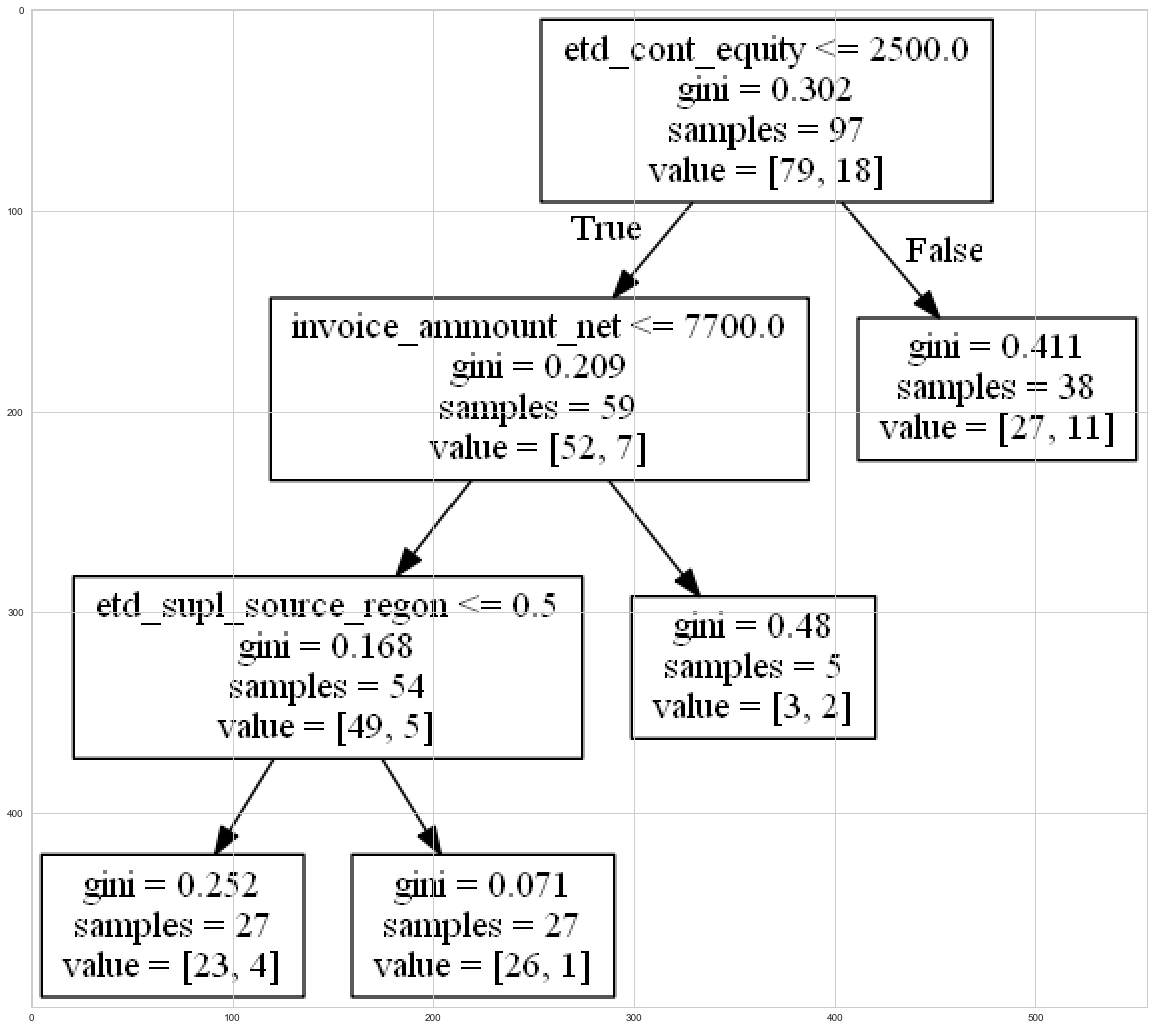

In [45]:
dt=classifier.fit(X_train,Y_train)
show_tree(dt,features,'dec_tree_invoices.png')

In [51]:
Y_pred = classifier.predict(X_test)
score=accuracy_score(Y_test, Y_pred)*100
score

88.0